# Downloading AND setup  all thing for configuration 🤑🤑

In [1]:
!git clone https://github.com/KoaBou/Masked_Age_Detection.git
%cd Masked_Age_Detection/

Cloning into 'Masked_Age_Detection'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 233 (delta 79), reused 61 (delta 61), pack-reused 136
Receiving objects: 100% (233/233), 846.71 KiB | 5.19 MiB/s, done.
Resolving deltas: 100% (126/126), done.
/content/Masked_Age_Detection


In [2]:
!pip install -r requirements.txt
!pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.5 MB/s eta 0:00:00
Processing /content/Masked_Age_Detection
  Preparing metadata (setup.py) ... done
  Created wheel for mivolo: filename=mivolo-0.4.2.dev0-py3-none-any.whl size=37558 sha256=1d906369becb0964e32847167c2763843cc8c31b1d8942c8ffd801057562a43c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pg7oghdl/wheels/ac/11/ba/c60eec1d91023f04fe3cae7178f17e92408cafbb10b1ea

In [3]:
!mkdir models
!pip install gdown
import gdown

# Đường dẫn đến file trên Google Drive
url = 'https://docs.google.com/uc?export=download&id=11i8pKctxz3wVkDBlWKvhYIh7kpVFXSZ4'

# Đường dẫn đến nơi lưu trữ file trên Colab
output = 'models/mivolo_imbd.pth.tar'

# Sử dụng gdown để tải file
gdown.download(url, output, quiet=False)

# Đường dẫn đến file trên Google Drive
url = 'https://docs.google.com/uc?export=download&id=1CGNCkZQNj5WkP3rLpENWAOgrBQkUWRdw'

# Đường dẫn đến nơi lưu trữ file trên Colab
output = 'models/yolov8x_person_face.pt'

# Sử dụng gdown để tải file
gdown.download(url, output, quiet=False)

Downloading...
From: https://docs.google.com/uc?export=download&id=11i8pKctxz3wVkDBlWKvhYIh7kpVFXSZ4
To: /content/Masked_Age_Detection/models/mivolo_imbd.pth.tar
100%|██████████| 110M/110M [00:01<00:00, 83.0MB/s]
Downloading...
From: https://docs.google.com/uc?export=download&id=1CGNCkZQNj5WkP3rLpENWAOgrBQkUWRdw
To: /content/Masked_Age_Detection/models/yolov8x_person_face.pt
100%|██████████| 137M/137M [00:02<00:00, 46.8MB/s]


'models/yolov8x_person_face.pt'

In [4]:
!git clone https://github.com/khengyun/FaceMask_Agumentation.git
!mv FaceMask_Agumentation/* .
!rm -rf ./FaceMask_Agumentation
# download file age_gender.csv
!gdown 19NC_k_UUxDozQvG1mA4eL9_mGwSAomLx

Cloning into 'FaceMask_Agumentation'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 83 (delta 13), reused 17 (delta 9), pack-reused 60
Receiving objects: 100% (83/83), 135.44 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (27/27), done.
Downloading...
From: https://drive.google.com/uc?id=19NC_k_UUxDozQvG1mA4eL9_mGwSAomLx
To: /content/Masked_Age_Detection/age_gender.csv
100% 200M/200M [00:03<00:00, 53.7MB/s]


In [5]:
from collections import defaultdict
from typing import Dict, Generator, List, Optional, Tuple

import cv2
import numpy as np
import torch
import tqdm
from mivolo.model.mi_volo import MiVOLO
from mivolo.model.yolo_detector import Detector
from mivolo.structures import AGE_GENDER_TYPE, PersonAndFaceResult
# from mivolo.model.mivolo_model import *
from mivolo.model.create_timm_model import create_model
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [6]:
# load model yolov8 for predict human face.
import os
from typing import Dict, Union

import numpy as np
import PIL
import torch
from mivolo.structures import PersonAndFaceResult
from ultralytics.yolo.engine.model import YOLO
from ultralytics.yolo.engine.results import Results

yolo_weight = YOLO('/content/Masked_Age_Detection/models/yolov8x_person_face.pt')

WARNING ⚠️ /content/Masked_Age_Detection/models/yolov8x_person_face.pt appears to require 'omegaconf', which is not in ultralytics requirements.
AutoInstall will run now for 'omegaconf' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement "omegaconf" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=a408490c14cea5ce802a7b0e3f9adec75020a50ab1a83e53d3d90bf3de89f894
  Stored in directory: /tmp/pip-ephem-wheel-cache-z_wtx6g_/wheels

In [33]:
# test normal mivolo models with input is yolo output. use code from source.
# in this step. use must turn on gpu.
!wget https://variety.com/wp-content/uploads/2023/04/MCDNOHA_SP001.jpg -O jennifer_lawrence.jpg

!python3 demo.py \
--input "jennifer_lawrence.jpg" \
--output "output" \
--detector-weights "models/yolov8x_person_face.pt " \
--checkpoint "/content/Masked_Age_Detection/models/mivolo_imbd.pth.tar" \
--device "cuda" \
--with-persons \
--draw

--2023-12-24 04:58:42--  https://variety.com/wp-content/uploads/2023/04/MCDNOHA_SP001.jpg
Resolving variety.com (variety.com)... 192.0.66.176
Connecting to variety.com (variety.com)|192.0.66.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416073 (406K) [image/jpeg]
Saving to: ‘jennifer_lawrence.jpg’

jennifer_lawrence.j 100%[===================>] 406.32K  --.-KB/s    in 0.1s    

2023-12-24 04:58:43 (3.32 MB/s) - ‘jennifer_lawrence.jpg’ saved [416073/416073]

Model summary (fused): 268 layers, 68125494 parameters, 0 gradients
Model meta:
min_age: 1, max_age: 95, avg_age: 48.0, num_classes: 3, in_chans: 6, with_persons_model: True, disable_faces: False, use_persons: True, only_age: False, num_classes_gender: 2, use_person_crops: True, use_face_crops: True
Loaded state_dict from checkpoint '/content/Masked_Age_Detection/models/mivolo_imbd.pth.tar'
Model mivolo_d1_224 created, param count: 28720158
Data processing configuration for current model + dataset:
	i

# Load and custome mivolo_imbd.pth.tar


In [34]:
checkpoint = torch.load('/content/Masked_Age_Detection/models/mivolo_imbd.pth.tar')

for key in checkpoint.keys():
  if key != 'state_dict':
    print(key+':',checkpoint[key])

print()
# for key, value in checkpoint['state_dict'].items():
#   print(key)


min_age: 1
max_age: 95
avg_age: 48.0
no_gender: False
with_persons_model: True



In [35]:
# clone weights to new model
new_state_dict = {}

for key, value in checkpoint['state_dict'].items():
  if 'map' in key:
    new_state_dict[key.replace('map', 'maskedMap')] = value
    new_state_dict[key.replace('map', 'nonMaskedMap')] = value
  else:
    new_state_dict[key] = value

In [36]:
# save model after clone
checkpoint['state_dict'] = new_state_dict
torch.save(checkpoint, '/content/Masked_Age_Detection/models/custome_mivolo.pth.tar')

In [37]:
# load custome model after save
from mivolo.model.mi_volo import MiVOLO
new_model = MiVOLO("/content/Masked_Age_Detection/models/custome_mivolo.pth.tar","cuda")
new_model = new_model.model_load()
# Set the model to evaluation mode
new_model.eval()

MiVOLOModel(
  (patch_embed): PatchEmbed(
    (conv1): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (conv2): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [38]:
# check first layer
first_layer = next(new_model.children())
print("First Layer:", first_layer)

First Layer: PatchEmbed(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64,

# test custome model

## rand input

In [39]:
# test model after load
# Create random input tensor for testing
batch_size = 1  # You can change this to your desired batch size
channels = 6  # Assuming RGB images
height = 224
width = 224
random_input = torch.rand((batch_size, channels, height, width),dtype=torch.float16).cuda()
output = new_model(random_input)
print("Model output:", output)

Model output: tensor([[ 0.4111, -0.4199, -0.1056]], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)


## image input

In [40]:
# down load to test
!gdown https://drive.google.com/uc?id=10P5lR_4qibNonuKMeOfEyTEiCfvszdqD

Downloading...
From: https://drive.google.com/uc?id=10P5lR_4qibNonuKMeOfEyTEiCfvszdqD
To: /content/Masked_Age_Detection/test.png
100% 36.2k/36.2k [00:00<00:00, 61.5MB/s]


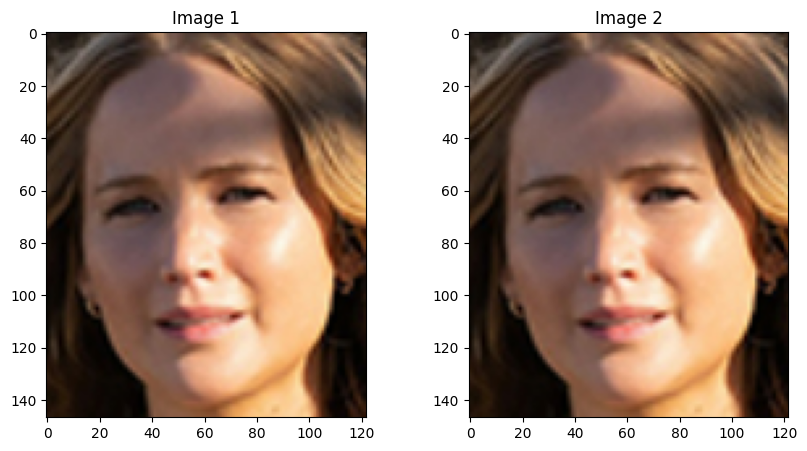

In [41]:
# Load and preprocess the first image using OpenCV
image_path1 = "test.png"
image1 = cv2.imread(image_path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load and preprocess the second image using OpenCV
image_path2 = "test.png"  # Replace with the path to your second image
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Ensure both images have the same dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Display the original images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image1)
axes[0].set_title('Image 1')

axes[1].imshow(image2)
axes[1].set_title('Image 2')

plt.show()



In [42]:
import cv2
import torch
import torchvision.transforms as transforms
import numpy as np

# Load and preprocess the first image using OpenCV
image_path1 = "test.png"
image1 = cv2.imread(image_path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Load and preprocess the second image using OpenCV
image_path2 = "test.png"  # Replace with the path to your second image
image2 = cv2.imread(image_path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Ensure both images have the same dimensions
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Concatenate the two images along the channel dimension
concatenated_image = np.concatenate([image1, image2], axis=2)

# Display the shape of the concatenated image
print("Concatenated Image Shape:", concatenated_image.shape)

# Split the concatenated image into two separate images with 3 channels each
image1_part = concatenated_image[:, :, :3]
image2_part = concatenated_image[:, :, 3:]

# Define a transformation to match the model's expected input
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])

# Apply the transformation to each image
input_tensor1 = transform(image1_part).unsqueeze(0)  # Add an extra dimension for batch size
input_tensor2 = transform(image2_part).unsqueeze(0)  # Add an extra dimension for batch size

# Concatenate the two input tensors along the channel dimension
final_input_tensor = torch.cat([input_tensor1, input_tensor2], dim=1)
final_input_tensor = final_input_tensor.to(device="cuda",dtype=torch.float16)

# Display the shape of the final input tensor
print("Final Input Tensor Shape:", final_input_tensor.shape)
# print("dtype: ", final_input_tensor.dtype)

# Forward pass through the model
output = new_model(final_input_tensor)

# Print the shape of the output tensor
print("Model Output Shape:", output.shape)
print("Model Output:", output)

Concatenated Image Shape: (147, 122, 6)
Final Input Tensor Shape: torch.Size([1, 6, 224, 224])
Model Output Shape: torch.Size([1, 3])
Model Output: tensor([[-2.9297,  2.9336, -0.1633]], device='cuda:0', dtype=torch.float16, grad_fn=<AddBackward0>)


In [43]:
# show output result
def print_output(output):
  age_output = output[:, 2]
  print("age_output: ",age_output)
  gender_output = output[:, :2].softmax(-1)
  print("gender_output: ",gender_output)
  gender_probs, gender_indx = gender_output.topk(1)

  for index in range(output.shape[0]):

      # get_age
      age = age_output[index].item()
      age = age * (95 - 1) + 48
      age = round(age, 2)

      print(f"\tage: {age}")
      gender = "male" if gender_indx[index].item() == 0 else "female"
      print(f"\tgender: {gender} [{int(gender_probs[index].item() * 100)}%]")
print_output(output)

age_output:  tensor([-0.1633], device='cuda:0', dtype=torch.float16, grad_fn=<SelectBackward0>)
gender_output:  tensor([[0.0028, 0.9971]], device='cuda:0', dtype=torch.float16, grad_fn=<SoftmaxBackward0>)
	age: 32.65
	gender: female [99%]


# Plot data from csv

In [44]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Masked_Age_Detection/age_gender.csv')

# Chuyển đổi cột "pixels" thành mảng 2D
df["pixels"] = df["pixels"].apply(lambda x: np.reshape(np.array(x.split(), dtype="float32"), (48, 48)))

# lấy sample để dùng cho trainning test
df = df.sample(n=500, random_state=42)  # random_state để giữ nguyên kết quả khi chạy lại mã

# In ra 5 dòng đầu tiên của mẫu ngẫu nhiên
print(df.head())


       age  ethnicity  gender                        img_name  \
17814   49          1       1  20170113184406976.jpg.chip.jpg   
15080   39          1       0  20170116001219696.jpg.chip.jpg   
22829    8          4       0  20170103200427437.jpg.chip.jpg   
16074   40          4       0  20170116213431880.jpg.chip.jpg   
8972    27          0       0  20170119150234550.jpg.chip.jpg   

                                                  pixels  
17814  [[31.0, 32.0, 28.0, 27.0, 34.0, 38.0, 37.0, 40...  
15080  [[186.0, 65.0, 38.0, 40.0, 36.0, 51.0, 64.0, 6...  
22829  [[20.0, 23.0, 35.0, 34.0, 45.0, 65.0, 69.0, 72...  
16074  [[6.0, 6.0, 13.0, 19.0, 15.0, 23.0, 41.0, 76.0...  
8972   [[31.0, 31.0, 29.0, 51.0, 98.0, 136.0, 162.0, ...  


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 17814 to 19341
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        500 non-null    int64 
 1   ethnicity  500 non-null    int64 
 2   gender     500 non-null    int64 
 3   img_name   500 non-null    object
 4   pixels     500 non-null    object
dtypes: int64(3), object(2)
memory usage: 23.4+ KB


In [46]:
fig = px.histogram(df, x="gender")
fig.update_layout(title_text='Age Histogram')
fig.show()

In [47]:
fig = px.histogram(df, x="age")
fig.update_layout(title_text='Age Histogram')
fig.show()

In [48]:
eth_values_to_labels = { 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" }
gender_values_to_labels = { 0: "Male", 1: "Female" }

In [49]:
fig = go.Figure([
    go.Bar(x=[eth_values_to_labels[i] for i in df.ethnicity.value_counts().index],
           y=df.ethnicity.value_counts().values)
])
fig.update_layout(
    title_text='Count Plot Ethnicity',
    xaxis_title='Ethnicity',
    yaxis_title='Count'
)
fig.show()

# Setup Dataset

In [51]:
# load data generator
from landmark_crop import FaceCropper
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Image processing
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

class dataset(Dataset):
    def __init__(self, df, face_cropper):
        self.df = df
        self.normalize = transforms.Normalize(mean = [0.485,0.456,0.406,0.485,0.456,0.406],std = [0.229,0.224,0.225, 0.229,0.224,0.225])
        self.face_cropper = face_cropper

    def __len__(self):
        return len(self.df)

    def __getitem__(self, ix):
        file = self.df.iloc[ix]
        age = torch.tensor(file.age / 116)
        gender = torch.tensor(file.gender).view(-1)
        eth = torch.tensor(file.ethnicity)
        im = file.pixels
        im = np.array(Image.fromarray(im).convert("RGB"))
        # print(im.shape)

        # Use the FaceCropper to crop faces before normalization
        cropped_faces = self.face_cropper.crop_faces_and_concat(im, mask=False)
        # print(cropped_faces.shape)

        # Assuming you want to use the first cropped face (you can modify this as needed)
        im = cropped_faces

        # im = cv.resize(im, (224, 224))
        # im = torch.tensor(im).permute(2, 1, 2)
        # im = torch.tensor(im).permute(2,0,1)
        im = self.normalize(im)


        return im.float().to(device), age.to(device), gender.float().to(device), eth.to(device)

In [50]:
# split data
msk = np.random.randn(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [52]:
train_new = dataset(train, FaceCropper())
val_new = dataset(test, FaceCropper())
train_loader = DataLoader(train_new,batch_size = 16,shuffle = True)
val_loader = DataLoader(val_new,batch_size = 16)

In [53]:
# im,a,b,c = next(iter(val_loader))

# Setup Model

In [71]:
# load custome models
from mivolo.model.mi_volo import MiVOLO
new_model = MiVOLO("/content/Masked_Age_Detection/models/custome_mivolo.pth.tar","cuda")
new_model = new_model.model_load()

In [55]:
print(new_model.parameters())

<generator object Module.parameters at 0x7a6f276d49e0>


In [72]:
optimizer = torch.optim.Adam(new_model.parameters(),lr=1e-4)
# hiện tại đang gặp lỗi sau optimizer.step() => tất cả giá trị bị NaN
# nếu bỏ qua cell này thì không có lỗi sải ra.

In [73]:
#loss function

age_criterion = nn.MSELoss().to(device, dtype = torch.float16)  # Update to mean squared error for age loss
gender_criterion = nn.BCEWithLogitsLoss().to(device, dtype = torch.float16)  # Update to binary cross-entropy for gender loss

# Start Trainning

In [ ]:
import time
from tqdm import tqdm
import torch

n_epochs = 15
val_age_maes = []
train_losses = []
val_losses = []
best_val_loss = float('inf')  # initialize with positive infinity
start = time.time()
clip_value = 1.0

for epoch in range(n_epochs):
    epoch_train_loss, epoch_val_loss = 0, 0
    val_age_mae, ctr = 0, 0

    for loader, is_train in [(train_loader, True), (val_loader, False)]:
        new_model.train() if is_train else new_model.eval()

        for data in tqdm(loader, desc=f"Epoch {epoch + 1}/{n_epochs} {'Train' if is_train else 'Validation'}"):
            im, age, gen, eth = data

            im, age, gen, _ = im.to(device, dtype = torch.float16), age.to(device, dtype = torch.float16), gen.to(device,dtype = torch.float16), eth.to(device,dtype = torch.float16)


            with torch.set_grad_enabled(is_train):
                new_model.half()
                kept = new_model(im)
                # print("kept: ", kept)
                # print("kept: ", kept.shape)
                # print("kept: ", kept.dtype)
                pred_age = kept[:, 2]
                pred_gen = kept[:, :2]
                gender_probs, gender_indx = pred_gen.topk(1)

                # print("============")
                # print(pred_age)
                # print(age)
                # print("============")

                age_loss = age_criterion(pred_age.to(device, dtype = torch.float16), age)
                # print("age_loss: ", age_loss)
                gen_loss = gender_criterion(gender_indx.float(), gen.view(-1, 1))
                # print("gen_loss: ", gen_loss)
                total_loss = age_loss + gen_loss


                if torch.isnan(total_loss) or torch.isinf(total_loss):
                    print(f'Warning: NaN or Inf encountered in {{"train" if is_train else "validation"}} loss. Skipping update.')
                    continue

                if is_train:
                    optimizer
                    optimizer.zero_grad()
                    total_loss = total_loss  # Cast to the desired dtype
                    total_loss.backward()
                    new_model.float()
                    optimizer.step()
                    epoch_train_loss += total_loss.item()
                else:
                    pred_gender = (gender_indx > 0.5).float()  # Use gender_probs for thresholding
                    gender_acc = (pred_gender == gen).float()
                    age_mae = torch.abs(age - pred_age).float().sum()
                    val_age_mae += age_mae
                    epoch_val_loss += total_loss.item()
                    ctr += len(data[0])

    val_age_mae /= ctr
    epoch_train_loss /= len(train_loader)
    epoch_val_loss /= len(val_loader)
    elapsed = time.time() - start
    best_val_loss = min(best_val_loss, epoch_val_loss)

    print(f'{epoch + 1}/{n_epochs} ({elapsed:.2f}s - {(n_epochs - epoch) * (elapsed / (epoch + 1)):.2f}s remaining)')
    info = f'''Epoch: {epoch + 1} \tTrain Loss: {epoch_train_loss:.3f} \tVal Loss: {epoch_val_loss:.3f} \tBest Val Loss: {best_val_loss:.4f}'''
    info += f'%\t Age MAE: {val_age_mae}'  # Fix the print statement
    print(info)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    val_age_maes.append(val_age_mae)


Epoch 1/15 Train:  24%|██▍       | 6/25 [00:06<00:19,  1.05s/it]

[tensor(0.1073, device='cuda:0'), tensor(0.1054, device='cuda:0'), tensor(0.0793, device='cuda:0'), tensor(0.0750, device='cuda:0'), tensor(0.0722, device='cuda:0'), tensor(0.0719, device='cuda:0'), tensor(0.0667, device='cuda:0'), tensor(0.0655, device='cuda:0'), tensor(0.0620, device='cuda:0'), tensor(0.0620, device='cuda:0'), tensor(0.0599, device='cuda:0'), tensor(0.0595, device='cuda:0'), tensor(0.0611, device='cuda:0'), tensor(0.0611, device='cuda:0'), tensor(0.0604, device='cuda:0')]


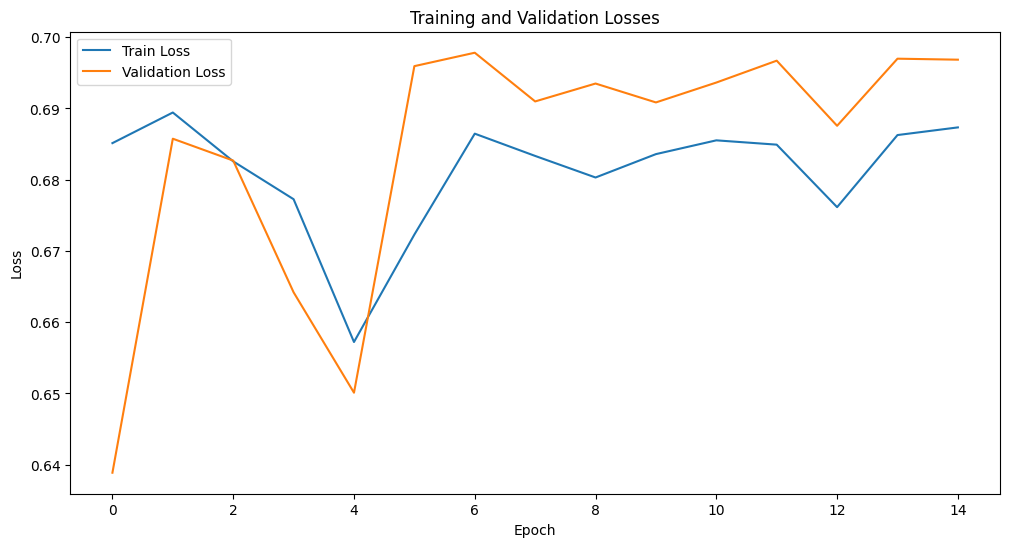

In [90]:
import matplotlib.pyplot as plt
print(val_age_maes)
# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


